In [1]:
include("fld.jl")
using Interpolations 
using PyPlot
using CSV
using Printf

In [68]:
tinit = 0.1
tfinal = 1-tinit
init_cond = convert(Array,CSV.read("g0p1.csv", header=0));;
final_cond = convert(Array,CSV.read("g1.csv", header=0));


print(size(init_condTe[:]))

(13832,)

In [59]:
A = rand(20)
A_x = 1.0:2.0:40.0
nodes = (A_x,)
print(nodes)
itp = interpolate(nodes, A, Gridded(Linear()))
itp(2.0)

(1.0:2.0:39.0,)

0.5852723314842251

In [60]:

println("Running until time $(tfinal)")
#set up Marshak wave problem with large R
Nr = 3
Nz = 250
Lz = 0.2
println("Size of domain in Z is $(Lz)")
Lr = 1000

dz = Lz/Nz

println(init_cond[:,1])

Running until time 0.9
Size of domain in Z is 0.2
[0.0]


In [61]:
#interpolate initial condition
itpTe = LinearInterpolation(init_cond[:,1], init_cond[:,2], extrapolation_bc = 1e-12)
itpTi = LinearInterpolation(init_cond[:,1], init_cond[:,3], extrapolation_bc = 1e-12)
xs = range(dz/2,stop=Lz-dz/2,length=Nz)

ErrorException: dimensions of length 1 not yet supported

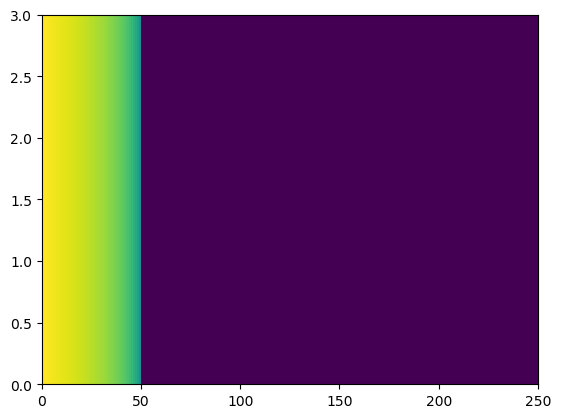

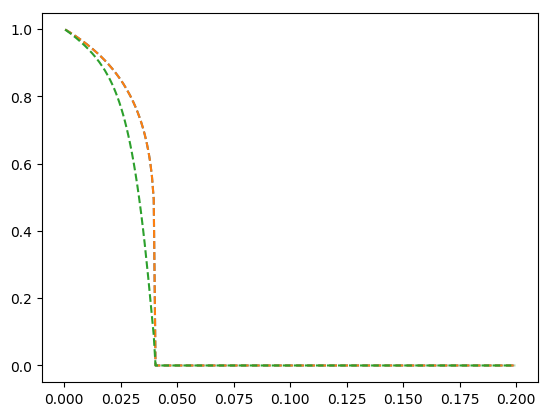

Q_func (generic function with 1 method)

In [62]:
Te_rect = zeros(Nr,Nz)
Ti_rect = zeros(Nr,Nz)

for r in 1:Nr
    Te_rect[r,:] = itpTe(xs)
    Ti_rect[r,:] = itpTi(xs)
end
Er_rect = a*Te_rect.^4
Te = reshape(Te_rect,Nz*Nr)
Ti = reshape(Ti_rect,Nz*Nr)
Er = reshape(Er_rect,Nz*Nr)
pcolor(reshape(Te_rect,Nr,Nz))
figure()
plot(xs,reshape(Te,Nr,Nz)[1,:],"--")
plot(xs,reshape(Te,Nr,Nz)[2,:],"--")
plot(xs,reshape(Ti,Nr,Nz)[1,:],"--")
plot(init_cond[:,1],init_cond[:,2])
plot(init_cond[:,1],init_cond[:,3])

sigma_func(t,T,Nr,Nz,Lr,Lz) = 3.0e2*abs.(reshape(T,Nr,Nz)).^-3
D_func(t,T,Nr,Nz,Lr,Lz,Er,sigma) = 1.0./(3.0*sigma)
cve_const = 0.3
Cve_func(t,T,Nr,Nz,Lr,Lz) = reshape(cve_const.+T*0, Nr,Nz)
EOSe(t,T,Nr,Nz,Lr,Lz) = cve_const*T
invEOSe(t,E,Nr,Nz,Lr,Lz) = (E/cve_const)
cvi_const = 0.15
Cvi_func(t,T,Nr,Nz,Lr,Lz) = reshape(cvi_const.+T*0, Nr,Nz)
EOSi(t,T,Nr,Nz,Lr,Lz) = cvi_const*T
invEOSi(t,E,Nr,Nz,Lr,Lz) = (E/cvi_const)
gamma_func(t,Te,Ti,Nr,Nz,Lr,Lz) = (Te*0).+ 1.0/(t+tinit+1e-10)/2

function Q_func(t,T,Nr,Nz,Lr,Lz)
    Q = zeros(Nr,Nz)
end
    

In [63]:
dt = 0.0001
times, Er_t,Te_t,Ti_t = time_dep_3T(tfinal,dt,Te,Ti,Er,D_func, sigma_func, Q_func,Q_func,Q_func,
    Cve_func,EOSe,invEOSe,
                      Cvi_func,EOSi,invEOSi,gamma_func,
                      Nr, Nz, Lr, Lz, lower_z=a, upper_z="vacuum", upper_r="refl",LOUD=-1);

9001
Step 9001, t = 0.9


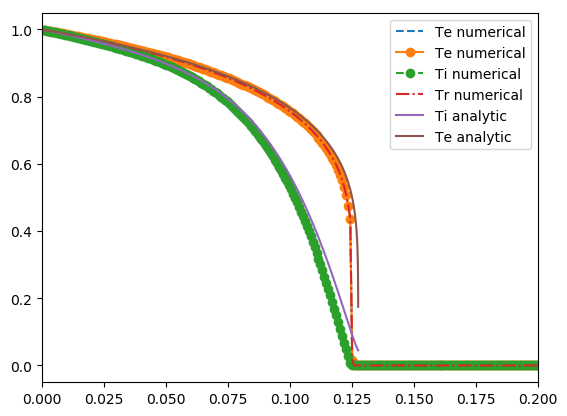

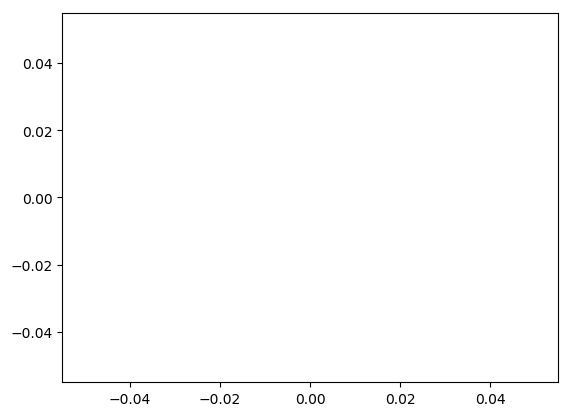

0-element Array{Any,1}

In [69]:
hr = Lr/Nr
hz = Lz/Nz
zmid = range(hz*0.5, stop=Lz-hz*0.5,length=Nz)
T_plot = reshape(Te_t[:,size(times)[1]],Nr,Nz)
plot(zmid,T_plot[2,:,1],"--", label="Te numerical")
plot(zmid,T_plot[1,:,1],"o-", label="Te numerical")
Ti_plot = reshape(Ti_t[:,size(times)[1]],Nr,Nz)
plot(zmid,Ti_plot[2,:,1],"o--", label="Ti numerical")
Tr_plot = reshape((Er_t[:,size(times)[1]]/a).^.25,Nr,Nz)
plot(zmid,Tr_plot[2,:,1],"-.", label="Tr numerical")

plot(final_cond[:,1],final_cond[:,3],label="Ti analytic")
plot(final_cond[:,1],final_cond[:,2],label="Te analytic")
#plot(init_condTimes,init_condTi,label="Ti analytic")
#plot(init_condTimes,init_condTe,label="Te analytic")
xlim(0,0.2)
legend(loc="best")

figure()
plot()

In [70]:
final_cond

12761×3 Array{Float64,2}:
 0.0      1.0       1.0      
 1.0e-5   0.999988  0.999985 
 2.0e-5   0.999975  0.99997  
 3.0e-5   0.999962  0.999956 
 4.0e-5   0.99995   0.999941 
 5.0e-5   0.999937  0.999926 
 6.0e-5   0.999924  0.999911 
 7.0e-5   0.999912  0.999896 
 8.0e-5   0.999899  0.999881 
 9.0e-5   0.999887  0.999866 
 0.0001   0.999874  0.999852 
 0.00011  0.999861  0.999837 
 0.00012  0.999849  0.999822 
 ⋮                           
 0.12749  0.299387  0.0462502
 0.1275   0.294858  0.046119 
 0.12751  0.289952  0.0459901
 0.12752  0.284594  0.0458639
 0.12753  0.278679  0.0457406
 0.12754  0.272062  0.0456205
 0.12755  0.264527  0.0455041
 0.12756  0.255738  0.0453918
 0.12757  0.245116  0.0452845
 0.12758  0.231528  0.0451834
 0.12759  0.212158  0.0450907
 0.1276   0.17463   0.0450117